
#순환신경망

RNN은 Feed Forward NN이 아니다. hidden layer의 출력값이 출력층으로 가면서 다음 hidden layer의 입력값으로 들어가는 특징이 있다. Cell은 이전의 값을 기억하는 메모리 역할을 한다. 이때 기억하는 값을 hidden state이라고 한다.



RNN은 입력과 출력의 길이를 다르게 설계할 수 있어 종류가 다양하다. 입력과 출력은 보통 단위 벡터이다.

1. one to many

하나의 이미지 입력에 대해서 사진의 제목을 출력하는 이미지 캡셔닝 작업에 사용할 수 있다. (제목은 단어의 나열이므로 출력이 여러개이다.)

2. many to one

입력 문서가 긍정적인지 부정적인지를 판별하는 감성 분류 등에 사용된다.

3. many to many

입력 문장으로부터 대답 문장을 출력하는 챗봇과 입력 문장으로부터 번역된 문장을 출력하는 번역기 등에 사용된다.



#RNN 수식

현재 시점 t에서의 은닉 상태값을 h{t}라고 정의해보자. 은닉층의 메모리 셀은 h{t}를 계산하기 위해서 총 두 개의 가중치를 갖게 된다.W{x}는 입력값에 적용하기 위한 가중치, W{h}는 이전 시점 t-1의 hidden state에 적용하기 위한 가중치이다.

은닉층 수식

h{t} = tanh(W{x} x{t} + W{h}h{t−1} + b)

출력층 수식

y{t} = f(W{y}h{t} + b)
-> f는 비선형 활성화 함수




#파이썬으로 RNN

In [ ]:
import numpy as np


In [ ]:
timesteps = 10
input_size = 4
hidden_size = 8

inputs = np.random.random((timesteps, input_size)) #10x4 크기의 2d tensor

hidden_state_t = np.zeros((hidden_size,)) #초기 hidden states


In [ ]:
Wx = np.random.random((hidden_size, input_size)) #hxi
Wh = np.random.random((hidden_size, hidden_size)) # hxh
b = np.random.random((hidden_size,)) #hx1

In [ ]:
total_hidden_states = []

for input_t in inputs:
  output_t = np.tanh(np.dot(Wx, input_t)+np.dot(Wh, hidden_state_t) + b)
  total_hidden_states.append(list(output_t))
  print(np.shape(total_hidden_states))
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis=0)

print(total_hidden_states)

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.99999533 0.99946259 0.99995687 0.9988346  0.99999661 0.99989979
  0.99999697 0.99986601]
 [0.99999875 0.99985071 0.99997995 0.99952148 0.99999948 0.99998412
  0.99999964 0.99996983]
 [0.99999243 0.99892697 0.9999226  0.99866857 0.99998998 0.99984398
  0.99999324 0.99981259]
 [0.99999628 0.99950153 0.99994006 0.99887772 0.99999749 0.99996765
  0.99999775 0.99995056]
 [0.99999926 0.99988021 0.99998314 0.99986338 0.99999936 0.99999239
  0.99999986 0.99997604]
 [0.99999705 0.99966392 0.99996853 0.99913508 0.99999829 0.99994337
  0.99999857 0.99991564]
 [0.99999665 0.99971003 0.99997758 0.99964986 0.99999774 0.99996661
  0.99999863 0.99984765]
 [0.99999808 0.99976447 0.99997988 0.99980712 0.99999798 0.99997368
  0.99999943 0.99989981]
 [0.99999882 0.99984511 0.9999868  0.99990096 0.99999859 0.99998026
  0.99999975 0.99990996]
 [0.99999598 0.99963251 0.99996967 0.99955667 0.99999714 0.99996823
  0.99999808 0.99986502]

#파이토치 RNN

In [ ]:
import torch
import torch.nn as nn

In [ ]:
input_size = 5
hidden_size = 8

In [ ]:
inputs = torch.Tensor(1,10,5)

In [ ]:
cell = nn.RNN(input_size, hidden_size, batch_first=True)

In [ ]:
outputs, status = cell(inputs)
#RNN의 출력값 1: 매 timestep마다 모든 hidden state 값들
#RNN의 출력값 2: 마지막 timestep의 hidden state

In [ ]:
print(outputs)
print(status)

tensor([[[-4.0464e-02, -2.1915e-01,  1.4623e-01,  4.4090e-01, -2.1730e-01,
           1.1811e-01,  2.3802e-01, -9.7453e-02],
         [ 1.1288e-01, -3.8352e-02,  6.8218e-05,  4.0013e-01, -1.0820e-01,
           1.7517e-01,  1.7729e-01, -2.0241e-01],
         [-6.0587e-03, -2.7508e-02, -2.3187e-02,  4.5232e-01, -1.2825e-01,
           2.1558e-01,  1.2647e-01, -1.8094e-01],
         [ 7.4784e-02, -1.0514e-02, -8.6327e-02,  4.7416e-01, -1.7746e-01,
           2.7750e-01,  1.2035e-01, -1.2773e-01],
         [ 9.9320e-02,  9.3379e-03, -1.2080e-01,  4.6538e-01, -2.0697e-01,
           2.5455e-01,  1.2105e-01, -1.1706e-01],
         [ 9.9417e-02,  4.6907e-03, -1.2215e-01,  4.6563e-01, -2.2535e-01,
           2.4920e-01,  1.1691e-01, -1.1816e-01],
         [ 1.0523e-01,  2.5387e-03, -1.2675e-01,  4.6427e-01, -2.2698e-01,
           2.4979e-01,  1.1896e-01, -1.2073e-01],
         [ 1.0300e-01,  4.3814e-03, -1.2607e-01,  4.6468e-01, -2.2580e-01,
           2.4741e-01,  1.1731e-01, -1.2358e-01],


#깊은 순환 신경망

앞 RNN보다 은닉층 수가 더 많은 것

nn.RNN에 num_layer로 층 수를 전달해야 한다.

In [ ]:
inputs = torch.Tensor(1,10,5)

cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first = True)

In [ ]:
outputs, last = cell(inputs)

In [ ]:
print(outputs)
print(last)

tensor([[[ 0.2138,  0.4268, -0.4367, -0.0652, -0.0415, -0.6304,  0.5749,
           0.8066],
         [ 0.2636,  0.5190, -0.0326, -0.6111,  0.3591, -0.5810,  0.5088,
           0.1171],
         [ 0.9039, -0.7256,  0.7881,  0.2056, -0.5172, -0.6974, -0.6756,
          -0.2712],
         [ 0.0120, -0.2464,  0.7417, -0.7722,  0.5379,  0.3264, -0.8105,
          -0.5031],
         [-0.1219,  0.5319,  0.3189, -0.7646, -0.7973, -0.4090, -0.5547,
           0.5351],
         [-0.4769, -0.2487, -0.6455, -0.9633,  0.4152, -0.8999,  0.8609,
           0.7799],
         [-0.2538,  0.7199, -0.8784, -0.6790,  0.2281, -0.8962,  0.8793,
           0.2346],
         [ 0.4505,  0.5163,  0.5332, -0.2791,  0.1572, -0.3310, -0.2212,
          -0.8543],
         [-0.1542, -0.1921, -0.0017, -0.9397,  0.3115, -0.7031,  0.1837,
           0.8434],
         [-0.4882,  0.9013,  0.1530, -0.6375, -0.6811,  0.2155, -0.7272,
          -0.5325]]], grad_fn=<TransposeBackward1>)
tensor([[[-1.0000,  1.0000, -1.0000, -

#양방향 순환 신경망

지금까지는 과거의 정보를 이용해 다음 정보를 예측하는 방법에 사용되는 종류들이었다.

하지만 양방향 RNN은 미래의 정보를 사용하여 이전 데이터를 예측할 수 있다.

Exercise is very effective at [_____] belly fat.

이런 것을 보면 이전에 나온 정보들로는 빈칸을 채울 수 없는, 예측할 수 없는 상황들이 생긴다.

이런 상황들을 해결하기 위해 양방향 RNN은 전 timestep 정보들만 아니라 이후 timestep의 정보들도 고려한다.
이를 구현하기 위해서 두 개의 cell을 사용한다.

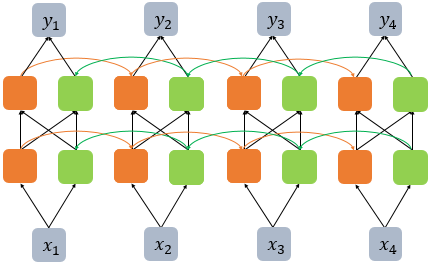

여기서 초록색 cell은 뒤 시점의 hidden state를 받아와 현재 은닉 상태를 계산한다.

In [ ]:
inputs = torch.Tensor(1,10,5)

cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first = True, bidirectional = True)

outputs, status = cell(inputs)
print(outputs.shape)

torch.Size([1, 10, 16])


hidden state가 기존의 두배가 됨을 볼 수 있다.

In [ ]:
print(status.shape)

torch.Size([4, 1, 8])


#바닐라 RNN의 한계

바닐라 RNN은 time step가 길어질수록 이전 정보를 잘 기억하지 못한다. 즉, 기억력이 부족하다. 이를 장기 의존성, long term dependencies 문제라고 한다.

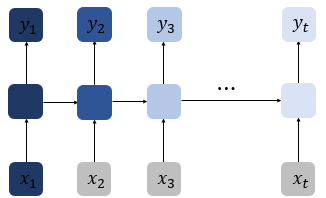

#LSTM (Long Short Term Memory)

기억력을 높이기 위해 input gate, forget gate, output gate를 사용하여 불필요한 기억들을 없애고 기억할 것들은 정하는 방법이다. 또, cell state를 통해 이전 정보들을 보관한다.

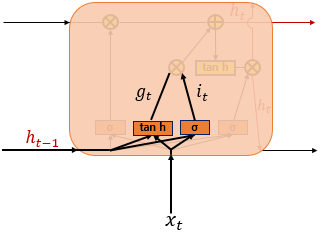

1. 입력게이트: 현재 정보를 기억하기 위한 게이트.
i_{t}=σ(W_{xi}x_{t}+W_{hi}h_{t-1}+b_{i})

g_{t}=tanh(W_{xg}x_{t}+W_{hg}h_{t-1}+b_{g})

i_{t}는 sigmoid의 결과이므로 0~1의 값이, g_{t}는 tanh의 결과이므로 -1~1의 값이 나온다. 이 두 값을 통해 이번에 선택된 기억할 정보의 양을 정한다.


2. 삭제 게이트

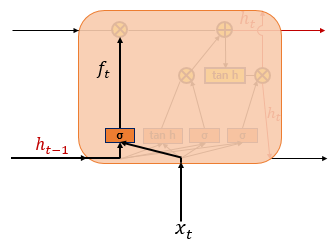

f_{t}=σ(W_{xf}x_{t}+W_{hf}h_{t-1}+b_{f})

0~1의 값 f_{t}은 삭제 과정을 거친 정보의 양이다. 0에 가까울수록 정보가 많이 삭제, 1에 가까울수록 기억을 온전히 기억한 것이다.

3. Cell state

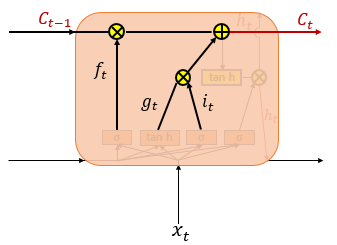

C_{t}=f_{t}∘C_{t-1}+i_{t}∘g_{t}

삭제 게이트의 출력값 f_{t}가 0이 된다면, 이전 cell state의 값과의 곱도 0이 되기 때문에 오직 입력 게이트의 결과만이 현재 시점의 Cell state를 결정하게 된다. 반대로 i_{t}가 0이 된다면 이전 Cell state만 의존하게 된다. 결과적으로 삭제 게이트는 이전 시점의 입력을 얼마나 반영할지를 의미하고, 입력 게이트는 현재 시점의 입력을 얼마나 반영할지를 결정합니다.

4. 출력 게이트

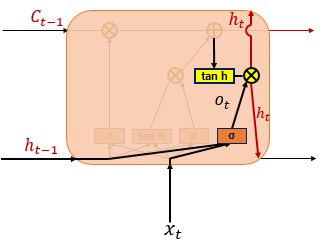

o_{t}=σ(W_{xo}x_{t}+W_{ho}h_{t-1}+b_{o})

h_{t}=o_{t}∘tanh(c_{t})



In [ ]:
#LSTM (Long Short Term Memory)
nn.LSTM(input_dim, hidden_size, batch_fisrt=True)
